In [1]:
import os
import math
import numpy as np
import scipy.linalg as la
import cv2
path= os.getcwd()

# Linear Algebra Review

## 1.1 Basics

**Python vs. Optimization**:

- Optimization: Vectors are always column vectors
  - A vector $a\in R^N$ is a n-tuple $\begin{bmatrix}a_1, a_2, \cdots, a_n\end{bmatrix}$ where $a_i \in R$
  - Note: In python vectors with 2nd row as 1


- `Inner Product:`
  $$a,b\in R^N, \langle a,b\rangle = \sum^N_{i=1} = a^Tb=b^Ta = \langle b,a \rangle$$ 


- `Euclidean norm:` Induced by inner-product
  $$a \in R^N, \|a\|_2 = \sqrt{\langle a,a \rangle}$$


- `Cauchy-schwarz:`
  $$|\langle a,b \rangle| \leq \|a\|_2 \|b\|_2$$


- `Triangle inequality:`
  $$|\langle a,b \rangle|_2 \leq \|a\|_2 \|b\|_2$$


### 1.1.1 Python example: inner product
- Python methods to calculate inner product:
    1. np.dot(a,b)
    2. a@b

In [2]:
# Generate two sets of vectors
a = np.random.randint(6, size=2)
b = np.random.randint(6, size=2)
print('Show a@b ==np.dot(a,b): {}\n'.format(a@b == np.dot(a,b)))

Show a@b ==np.dot(a,b): True



### 1.1.2 Python example: triangle equality

In [3]:
import sys
sys.path.append(path+'/Modules')
from L1_vectors import *

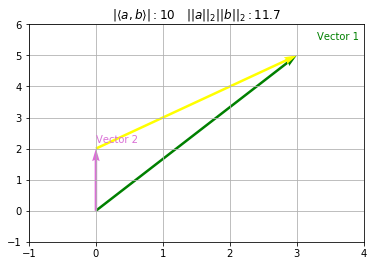

In [4]:
# Generate two sets of vectors
a = np.random.randint(6, size=2)
b = np.random.randint(6, size=2)

triange_inequality([a,b]).graph()

### 1.1.3 Python example: triangle inequality

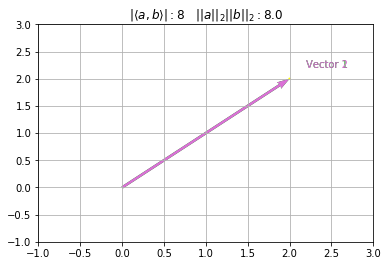

In [5]:
a = np.array([2,2])
b = np.array([2,2])
triange_inequality([a,b]).graph()

## 1.2 Norms

### 1.2.1 Definition
1. Homogeneity:
$$||\alpha x||= ||\alpha| \ ||x||, \text{for} \ \  x\in R^N \text{and} \ \ \alpha \in R$$
2. Subadditivity:
$$||x+y||\leq ||x|| + ||y||, \text{for} \ x,y\in R^N$$

3. Separability:
  - If and only if $||x||=0 \Rightarrow x=0$


Norms:
- $||x||_2$
- $||x||_1$
- $\sqrt{x^T Ax} \rightarrow$ Postive definite 

Not Norms:
- $||x||_0 \rightarrow$ not homogenous 
- $||\nabla x||_2 \rightarrow$ not seperable

### 1.2.2 $\ell_p$ norms

- Controls effect of outliers
- If p is really small it doesn't blow up outliers
- Zero norm just counts the number of non-zeros

$$p\geq 1, a\in R^N, ||a||_p = \Big(\sum^N_{i=1} {a_i|^p} \Big)^{1/p} \tag{1.2.2}$$

- $\ell_2: p=2, \ \ ||a||_2 = \sqrt{\sum_i |a_i|^2}$


- $\ell_1: p=1, \ \ ||a||_1 = \sum_i |a_i|$


- $\ell_\infty: p=\infty, \ \ ||a||_\infty = max_i |a_i|$
  - Looks at the largest entry (outlier) in the data

#### 1.2.2.1 Python example: norms with np.linalg.norm

In [6]:
c = np.array([ 1, 2, 3, 20])
norms = [1,2, np.inf]
for i in norms:
    print('{}-norm: {}'.format(i, round(np.linalg.norm(c, i),3)))

1-norm: 26.0
2-norm: 20.347
inf-norm: 20.0


#### 1.2.2.2 Python example: norms using equation from 1.2.2 
*User created function*

In [7]:
def lp_norm(vector, norm):    
    exponent = [x**norm for x in vector]
    sums = sum(exponent)
    root = (sums)**(1/norm)
    return root

norms = [1,2]
for i in norms:
    print('{}-norm: {}....same as 1.2.1? {}'.format(i, round(lp_norm(c, i),3), lp_norm(c, i)==np.linalg.norm(c, i)))

1-norm: 26.0....same as 1.2.1? True
2-norm: 20.347....same as 1.2.1? True


In [8]:
#Same function as above using lambda
lambda_func = lambda vector, norm: (sum(vector**norm))**(1/norm)
lambda_func(c,2)==lp_norm(c, 2)

True

#### 1.2.2.3 Python example: Norm calculation

**The default norm in python is the frobenius**

- Python methods to calculate norm:
    1. math.sqrt(VECTOR)
    2. np.linalg.norm(VECTOR)

In [9]:
# Generate two sets of vectors
a = np.random.randint(10, size=5)
b = np.random.randint(10, size=5)
# Note that the calculations of methods 1. and 2. are equal
solu_1221 = math.sqrt(a@a)==np.linalg.norm(a)
print('math.sqrt()== np.linalg.norm(): {}\n'.format(solu_1221))
print(tuple([math.sqrt(a@a), np.linalg.norm(b)]))

math.sqrt()== np.linalg.norm(): True

(11.61895003862225, 12.609520212918492)


#### 1.2.2.4 Norm calculation: multiple vectors at once by creating tuple (User created function)

In [10]:
combined = [a,b]
squared = tuple([x**2 for x in combined])
mag = tuple([math.sqrt(sum(x)) for x in squared])
print('Does the solution equal above methods: {}'.format(tuple([math.sqrt(a@a), math.sqrt(b@b)])== mag))
print(mag)

Does the solution equal above methods: True
(11.61895003862225, 12.609520212918492)


#### 1.2.2.1 Triangle inequality for p norm
*Minkowski's inequality*
$$1\leq p\leq \infty, ||a,b||_p \leq ||a||_p + ||b||_p$$

### 1.3 $\ell_p$-norm balls

<img src='Images/Norm_balls.png'>

### 1.3.1 Python example: Norm balls

Code reference: Liaw, Ben (2019). https://benliaw.ai/Building-Intuition-with-Norm-Balls-in-Hyperdimensions.html)



In [11]:
import sys
sys.path.append('Modules')

In [12]:
#Importing module from norms.py in the Modules folder
from L1_norms import *
def norm_ratios(pt_colors):
    """Calculate ratios of L1, L2, L infinity norm balls.
    Parameters
    ----------
    pt_colors : array, str color of pts
    Returns
    -------
    Float ratio of L1 / L infinity, ratio of L2 / L infinity
    """
    L1_pts = len(pt_colors[pt_colors == 'g'])
    L2_pts = len(pt_colors[pt_colors == 'r'])
    Linf_pts = len(pt_colors[pt_colors == 'b'])
    total_pts = L1_pts + L2_pts + Linf_pts
    return L1_pts / total_pts, (L1_pts + L2_pts) / total_pts

# GLOBAL VARS
SHOW_N = 5
TRIALS = 100000


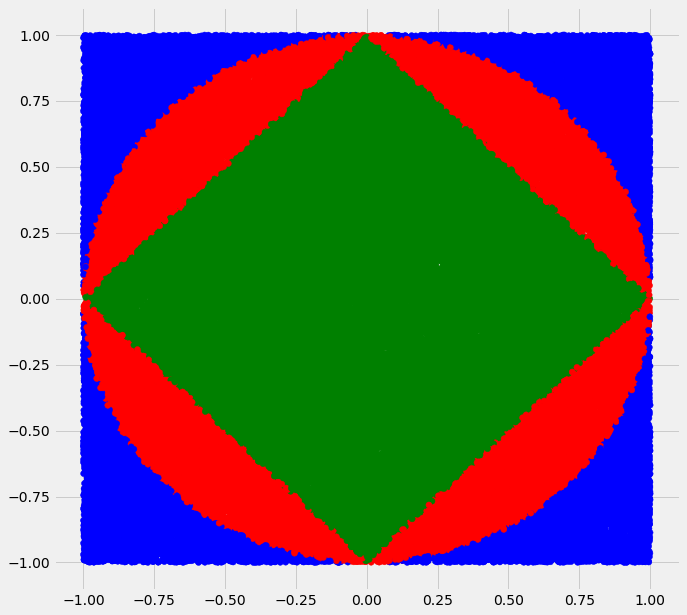

In [13]:
r2 = DartSimulation(TRIALS)
r2.plot_pts_2d()

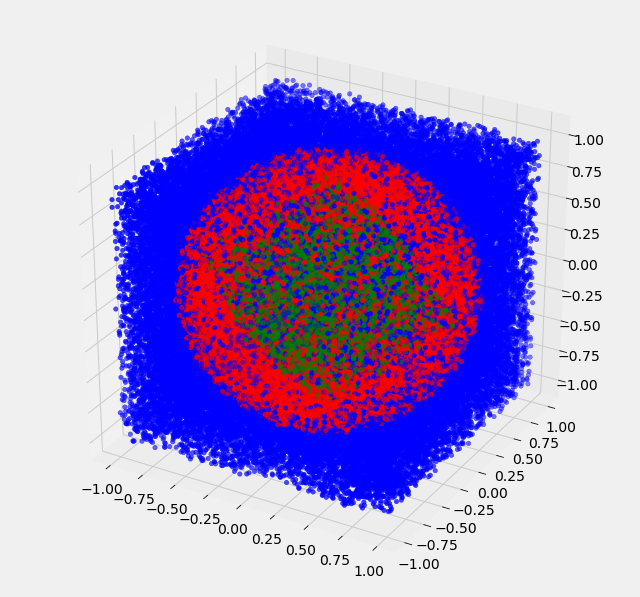

In [14]:
r3 = DartSimulation(TRIALS, 3)
r3.plot_pts_3d()

## 1.4 Equivalence of norms

Two norms are equivalent up to a constant

Given any two norms, say $\ell_p$ and $\ell_q , \exists \ \ \alpha, \beta >0$ such that:

$$\forall a \in R^n , \alpha ||a||_p \leq ||a||_p \leq \beta ||a||_q$$

- $||a||_\infty \leq ||a||_2 \leq \sqrt{N} ||a||_\infty$
- $||a||_\infty \leq ||a||_1 \leq N ||a||_\infty$
- $||a||_2\leq ||a||_1 \leq \sqrt{N} ||a||_2$

**Lemma (General equivalence of $\ell_p$ norms)**
$$1\leq p < q, \ \ \ ||a||_q \leq ||a||_p \leq N^{1/p-1/q} ||a||_q$$

### 1.4.1 Python example: General equivalence of $\ell_p$ norms 
*User created function*

In [15]:
def equiv(vector, p, q):
    assert p<q, 'q must be greater than p'
    right_side= (len(vector)**((1/p)-(1/q)))*np.linalg.norm(c, q)
    gen_equiv_norms = np.linalg.norm(vector, q)< np.linalg.norm(vector, p) < right_side
    print('|a|q < |a|p < N^(1/p-1/q)|a|q ? {}'.format(gen_equiv_norms))

c = np.array([ 1, 2, 3, 20])    
equiv(c,1,2)

|a|q < |a|p < N^(1/p-1/q)|a|q ? True


In [16]:
np.linalg.norm(c, 2)<np.linalg.norm(c, 1)< math.sqrt(len(c))*np.linalg.norm(c, 2)

True

## 1.5 Two important equalities

### 1.5.1 Holder's inequality
- Generalization of the Cauchy-Schwarz inequality for p-norms
- Useful for difficult optimization problems

### 1.5.2 Jensen's inequality
- All convex functions must satisfy
- Convex must curve up


# 2. Subspaces
A set of T-vectors, $V=\{a_1,a_2, \cdots a_T$ \}

- Linear combination
- Linearly independent: No vector can be written as a combination of others
- Span: Set of all linear combination you can form

`Subspace:` A collection of vectors $V \subset R^N \iff$ it is close under linear combinations

`Basis of a subspace:` A linearly independent spanning set


`Dimensionality of subspace:` # of elements in a basis

## 2.1 Four fundamental subspaces of linear algebra


1. Column space: C(A), Dimension= r
2. Column space: $C(A^T)$, Dimension= r
3. Null space: N(A), Dimension= n-r
1. Null space: $N(A^T)$, Dimension= m-r


## 2.2 Matrices

### 2.2.1 Basics

- $A\in R^{MxN}$


- $A = [a_{ij}] = [a_1, a_2,\cdots a_N]$


- Rank(A) = largest # of linearly independent columns


- Rank(A)= $rank(A^T) \leq min(M,N)$


- A is a full rank if $rank(A) = min(M,N)$

**Matrixs are representations of linear operators!!!**

$$A: R^N \rightarrow R^M \\ x\in R^N \mapsto Ax\in R^M$$


Examples of linear operators that aren't matrices:
- Fourier transform
- Convolutional operations
- Wavelet transform

### 2.2.2 Matrix norms


Spectral norm:

$$||A||_{2,2} = \underset{x\neq0}{\text{max}} = \frac{||Ax||_2}{||x||_2}  = \underset{||x||_2=1}{\text{max}}||Ax||_2$$

- Measures the max increase in length of a unit-norm vectors due to the operation of matrix A

- $||A||_{2,2}$ = largest singular value of A
- $||AB||_{2,2} \leq ||A||_{2,2}||B||_{2,2}$

#### Induced matrix norms

- $||A||_{2,2}$ the max singular value of A
- $||A||_{1,1}$ = max of the absolute column sums
- $||A||_{\infty,\infty}$ = max of the absolute row sums

#### 2.2.2.1 Python example: 1-norm

In [17]:
matrix = np.array([[-4, -3],[2,1]])
def matrix_1_norm(matrix, norm):
    sum_col = np.sum(abs(matrix), axis=0)
    solu = max(sum_col)
    assert round(solu,4)==round(np.linalg.norm(matrix,1),4), 'Solution not consistent with np.linalg.norm(matrix,1)'
    return solu
matrix_1_norm(matrix, 1)

6

#### 2.2.2.2 Pyton example: 2-norm

In [18]:
matrix = np.array([[-1, 3],[3,-4],[1,7]])
def matrix_2_norm(matrix):
    dot = matrix.T@matrix
    eig = np.linalg.eig(dot)[0]
    solu = math.sqrt(max(eig))
    assert round(solu,4)==round(np.linalg.norm(matrix,2),4), 'Solution not consistent with np.linalg.norm(matrix,2)'
    return solu
print("Matrix 2-Norm: {}".format(matrix_2_norm(matrix)))

Matrix 2-Norm: 8.660254037844387


#### 2.2.2.3 Python example: $\infty$ norm

In [19]:
matrix = np.array([[-4, -3],[2,1]])
def matrix_infty_norm(matrix, norm):
    sum_col = np.sum(abs(matrix), axis=1)
    solu = max(sum_col)
    assert round(np.linalg.norm(matrix, np.infty),3)== round(solu,3), 'Solution not consistent with np.linalg.norm(matrix,np.infty)'
    return solu
matrix_infty_norm(matrix, 1)

7

### 2.2.4 Other norms

Frobenius norm: sum squares of entries of matrix
$$||A||_F = \sqrt{\sum_{i,j}|A_i,j|}$$


Nuclear norm: sum of singular values of a matrix
- Squaring all eigenvalues, taking the magnitude of all eigens, trace of the sum is the sum of the eigenvalues

$$||A||_* = trace(\sqrt{A^T A}) = \sum^{min\{M,N\}}_{i=1} \sigma_i$$

#### 2.2.4.1 Python example: Other norms (Frobenius, Nuclear)

In [20]:
matrix = np.array([[-4, -3],[2,1]])
def matrix_fro_norm(matrix):
    vector = matrix.ravel()
    exponent = [x**2 for x in vector]
    sums = sum(exponent)
    solu = (sums)**(1/2)
    assert round(np.linalg.norm(matrix, 'fro'),3)== round(solu,3), "Solution not consistent with np.linalg.norm(matrix,'fro')"
    return solu
matrix_fro_norm(matrix)

5.477225575051661

# 2.3 Factoring Matrices

### 2.3.1 Eigenvalues and eigenvectors
Eigenvectors that stretches or compresses a matrix

$$Ax = \lambda x$$

- Where x is an eigenvector and $\lambda$ is an eigenvalue of A

- Eigenvectors are vectors in $R^N$ whose direction is preserved, however length may change

Eigen-decomposition

$$A=UDU^{-1}$$


#### 2.3.1.1 Python example: Eigvenvalues and eigenvectors

In [21]:
np.random.seed(1)
A = np.random.randint(20, size=(3,3))
print(A)
print('\n Reproduce matrix A via eigen-decomposition \n')
values, vectors = np.linalg.eig(A)
U = vectors
U_inv = np.linalg.inv(vectors)
D = np.diag(values)
eigen = U@D@U_inv
print(eigen)

[[ 5 11 12]
 [ 8  9 11]
 [ 5 15  0]]

 Reproduce matrix A via eigen-decomposition 

[[5.0000000e+00 1.1000000e+01 1.2000000e+01]
 [8.0000000e+00 9.0000000e+00 1.1000000e+01]
 [5.0000000e+00 1.5000000e+01 3.9670199e-15]]


### 2.3.2 Gram Schmidt

A = QR



#### 2.3.2.1 Python example: QR

In [22]:
print("Matrix A:\n", A, "\n") #Original matrix A

Q, R = np.linalg.qr(A) # QR decomposition

print("Matrix Q:\n", Q, "\n")
print("Matrix L:\n", R, "\n")
print("Matrix: Q*R=A\n",Q.dot(R))

Matrix A:
 [[ 5 11 12]
 [ 8  9 11]
 [ 5 15  0]] 

Matrix Q:
 [[-0.46829291  0.25753704 -0.84520792]
 [-0.74926865 -0.622733    0.22538878]
 [-0.46829291  0.73883576  0.48458587]] 

Matrix L:
 [[-10.67707825 -18.91903339 -13.86147001]
 [  0.           8.31084685  -3.75961855]
 [  0.           0.          -7.66321848]] 

Matrix: Q*R=A
 [[5.00000000e+00 1.10000000e+01 1.20000000e+01]
 [8.00000000e+00 9.00000000e+00 1.10000000e+01]
 [5.00000000e+00 1.50000000e+01 3.35918975e-15]]


### 2.3.3 Symmetric matrices
$$S= Q\lambda Q^T$$
   - Eigen vectors are orthogonal
   - Symmetric matrix
   - Matrix can be diagonlized
   - All eigenvalues are real

#### 2.3.3.1 Python example: Symmtric matrices

In [23]:
A = np.array([[1,7,3],[7,4,-5],[3,-5,6]])  #Original matrix A

values, vectors = np.linalg.eig(A)

#Show all combinations of eigenvectors are orthogonal
from itertools import combinations
[round(vectors[0]@vectors[1],3) for x in combinations(range(3), 2)]

[-0.0, -0.0, -0.0]

### 2.3.4 LU: Elimination matrix
- Now, LU decomposition is essentially gaussian elimination, but we work only with the matrix A (as opposed to the augmented matrix).

$$A=LU$$

#### [Householder reflections](https://en.wikipedia.org/wiki/QR_algorithm) are used in the LU decomposition



#### 2.3.4.1 Python example: LU

In [24]:
A = np.array([[1,3,4],[2,1,3],[4,1,2]])  #Original matrix A
print("Matrix A:\n", A, "\n")

P, L, U = la.lu(A) #LU decomposition

L = np.array([[1,0,0],[2,1,0],[4,11/5,1]])
print("Matrix L:\n", L, "\n")
U = np.array([[1,3,4],[0,-5,-5],[0,0,-3]])
print("Matrix U:\n", U, "\n")
print("Matrix: L*U=A\n",L.dot(U))

Matrix A:
 [[1 3 4]
 [2 1 3]
 [4 1 2]] 

Matrix L:
 [[1.  0.  0. ]
 [2.  1.  0. ]
 [4.  2.2 1. ]] 

Matrix U:
 [[ 1  3  4]
 [ 0 -5 -5]
 [ 0  0 -3]] 

Matrix: L*U=A
 [[1. 3. 4.]
 [2. 1. 3.]
 [4. 1. 2.]]



### 2.2.5 Spectral theorem

If $A=A^H$

If matrix is symmetric: 
- All the eigen values are real
- Eigenvectors with different eigenvalues are perpendicular
- $\exists$ a complete orthogonal basis of vectors

If the matrix is symmetric then eigevenvalue decomposition is useful because you can represent space in terms of the span of the eigenvalues and you can analyze the matrix by looking at the eigenvalue independently
- Should not be used for non-symmetric matrix


### 2.2.6 Choleskey decomposition

Cholesky decomposition is about twice as fast as LU decomposition

where L is lower-triangular with positive diagonal elements and LT is its transpose. This decomposition is known as the Cholesky decompostion, and L may be interpreted as the ‘square root’ of the matrix A.

In [25]:
A = np.array([[1,3,5],[3,13,23],[5,23,42]]) #Original matrix
print("Matrix A:\n", A, "\n")


L = np.linalg.cholesky(A)
print("L:\n", L)
print("\nL.T@L:\n", np.dot(L, L.T))

Matrix A:
 [[ 1  3  5]
 [ 3 13 23]
 [ 5 23 42]] 

L:
 [[1. 0. 0.]
 [3. 2. 0.]
 [5. 4. 1.]]

L.T@L:
 [[ 1.  3.  5.]
 [ 3. 13. 23.]
 [ 5. 23. 42.]]


# 3. SVD

## 3.1 Basics

$$A = U \sum V^T$$

- Where $U$ and $V^T$ are orthogonal and $\sum$ is diagonal

SVD can be used with non-symmetric matrix, because it always exists 
- Similar to eigen expect that the start and end of rotation don't have to be the same
    - You can rotate, shrink, and rotate without having it be the inverse
    
If $A^{-1}$ exists then $A^{-1} = V\sum^{-1} U^T$

- U is the same as V when the matrix is symmetric and positive definite


## 3.2 Python Examples: SVD

- Code reference: hadrienj (2019). "2.8 Singular Value Decomposition.ipynb" https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.8%20Singular%20Value%20Decomposition/2.8%20Singular%20Value%20Decomposition.ipynb
    
  

In [26]:
#Importing module from L1_unit_circle.py in the Modules folder
from L1_unit_circle import *

### 3.2.1 Three transformations of SVD

#### 3.2.1.1 First show example of unit circle matrix transform

Unit circle transformed by A:
 [[-1.5  1. ]
 [ 1.   3. ]]


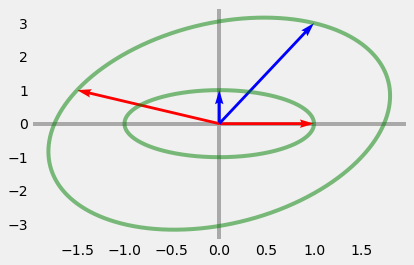

In [27]:
A = np.array([[-1.5, 1], [1, 3]])
print('Unit circle transformed by A:\n {}'.format(A))
matrixToPlot(np.array([[1, 0], [0, 1]]))
matrixToPlot(A)
plt.grid()

#### 3.2.1.2 Show SVD of above matrix A

In [28]:
U, D, V = np.linalg.svd(A)

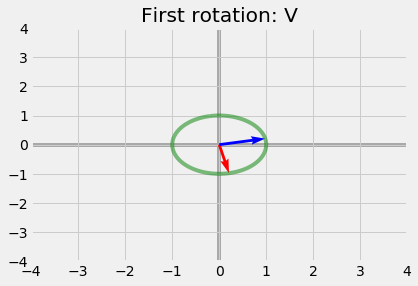

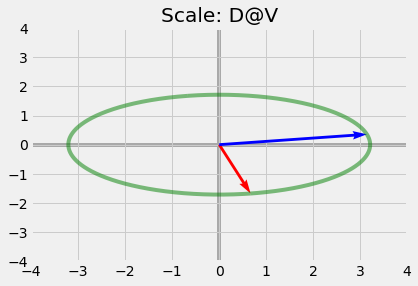

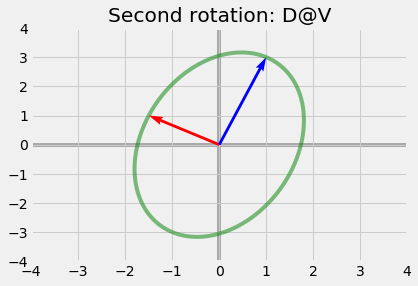

In [29]:
matrixToPlot(V)
plt.title('First rotation: V')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
matrixToPlot(np.diag(D)@V)
plt.title('Scale: D@V')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.title('Second rotation: D@V')
plt.xlim(-4, 4)
plt.ylim(-4, 4);



### 3.2.3 Construct low rank matrices using SVD

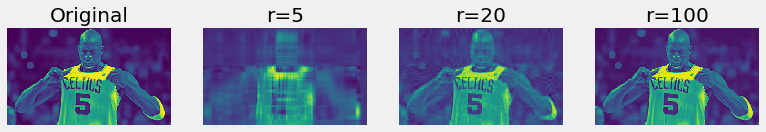

In [30]:
#Original image
A = cv2.imread("Images/Kevin_Garnett.jpg")
X = np.mean(A, -1)
#SVD
U, S, VT = np.linalg.svd(X, full_matrices=False) 
S = np.diag(S)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 6),sharex=True, sharey=True)
#Show images by different ranks
ax[0].imshow(X)
ax[0].axis('off')
ax[0].set_title('Original')
for idx, r in enumerate([5,20,100]):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    ax[idx+1].axis('off')
    ax[idx+1].imshow(Xapprox)
    ax[idx+1].set_title("r="+str(r))


### 3.2.2 Show size of singular values

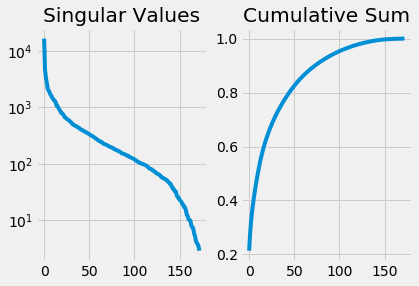

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharex=True)

ax[0].semilogy(np.diag(S))
ax[0].set_title('Singular Values')
ax[1].plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
ax[1].set_title('Cumulative Sum');


## 3.3 Unitary transformations

$$X= U\sum V^T$$

#### Important takeaway: U = How it is rotated, $\sum$= How much it is stretched


- $U \ \ V^T$ are unitary

- If we use the economy SVD: $UU^T\neq Identity$

- Unitary transformations peserve angles and length of vectors
 
 Unitary transformation example: Fourier
    
$$\langle x,y \rangle = \langle Ux,Uy \rangle  \ \ \  \ \ \ \forall x,y \in R^n$$

- If X is complex $\in C^{NxM}$ then $X^*$ is complex conjugate is the transpose
    - Example: Faces would still have the same geometery after unitary transpose


### 3.3.1 Python example: Unitary transformations

## 3.4. Pseudoinverse

- SVD allows us to generalize Ax=b to non-square matrices


UNDER-determined system: 
- n<m (short fat matrix)
- Not enough measurments in b to determine solutions
- Using SVD: Min norm solution


OVER-determined system: 
- n>m (Long skinny)
- Zero solutions x for generic b. 
- Not enough degrees of freedom in x
- Using SVD: least square solution

SVD allows us to take pseudo inverse

$$
Ax=b \\
U\sum V^Tx=b\\
\tilde{x}= V\sum^{-1} U^T b\\
=A^{+}b
$$

### 3.4.2 Python examples: Pseudoinverse 

#### 3.4.2.1 Comparing svd and pinv commands

- Code reference: hadrienj (2019). "2.9 The Moore-Penrose Pseudoinverse.ipynb" https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.9%20The%20Moore-Penrose%20Pseudoinverse/2.9%20The%20Moore-Penrose%20Pseudoinverse.ipynb
    


In [32]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)
print("Matrix A:\n", A, "\n")
D_plus = np.zeros((A.shape[0], A.shape[1])).T
D_plus[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))
print("Matrix D_plus:\n", D_plus, "\n")
A_plus = V.T.dot(D_plus).dot(U.T)
print("Matrix A_plus:\n", A_plus, "\n")
pseduo_inv = np.linalg.pinv(A)
print("Pseudo inverse:\n", pseduo_inv)

Matrix A:
 [[7 2]
 [3 4]
 [5 3]] 

Matrix D_plus:
 [[0.0975474  0.         0.        ]
 [0.         0.38046613 0.        ]] 

Matrix A_plus:
 [[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]] 

Pseudo inverse:
 [[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]]


#### 3.4.2.2 Over- and under-determined systms

In [46]:
A = np.array([[1,1,1],[1,1,1]])
b = np.array([1,2])
under = np.linalg.pinv(A)@b
print('Under-determined\n', under)
A = np.array([[1,2],[2,3],[3,4]])
b = np.array([[2],[3],[4]])
over = np.linalg.pinv(A)@b
print('Over-determined\n', over)

Under-determined
 [0.5 0.5 0.5]
Over-determined
 [[-8.8817842e-16]
 [ 1.0000000e+00]]


#### 3.4.2.3 Pseudoinverse of three equations
- Code reference: hadrienj (2019). "2.9 The Moore-Penrose Pseudoinverse.ipynb" https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.9%20The%20Moore-Penrose%20Pseudoinverse/2.9%20The%20Moore-Penrose%20Pseudoinverse.ipynb
    

    - Code modified

$$\begin{cases} -2x_1 + 2 = x_2 \\ 4x_1 + 8 = x_2 \\ -1x_1 + 2 = x_2 \end{cases} \Leftrightarrow \begin{cases} -2x_1 - x_2 = -2 \\ 4x_1 - x_2 = -8 \\ -1x_1 - x_2 = -2 \end{cases}$$

- The solution is at the intersection of the three symmedians of the triangle

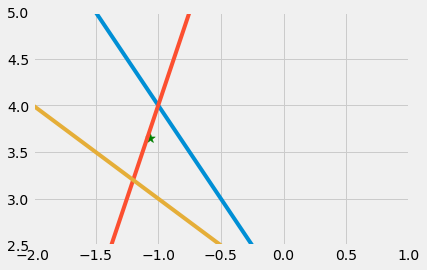

In [34]:
#Plot lines
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

#Calculate psuedo inverse
A = np.array([[-2, -1], [4, -1], [-1, -1]])
A_plus = np.linalg.pinv(A)
b = np.array([[-2], [-8], [-2]])
res = A_plus.dot(b)
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.scatter(res[0], res[1],s=100, color='green', marker='*')
plt.xlim(-2., 1)
plt.ylim(2.5, 5);

#### 3.4.2.4 Least squares with pseudoinverse

- Code citation: hadrienj (2019). "2.9 The Moore-Penrose Pseudoinverse.ipynb" https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.9%20The%20Moore-Penrose%20Pseudoinverse/2.9%20The%20Moore-Penrose%20Pseudoinverse.ipynb
    


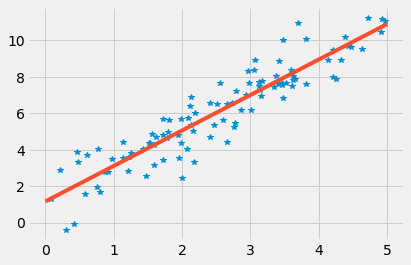

In [35]:
np.random.seed(123)
x = 5*np.random.rand(100)
y = 2*x + 1 + np.random.randn(100)

x = x.reshape(100, 1)
y = y.reshape(100, 1)

A = np.hstack((x, np.ones(np.shape(x))))

A_plus = np.linalg.pinv(A)
coefs = A_plus.dot(y)
x_line = np.linspace(0, 5, 1000)
y_line = coefs[0]*x_line + coefs[1]

plt.plot(x, y, '*')
plt.plot(x_line, y_line)
plt.show()

## 3.5 SVD & condtion numbers

- Only small perturbations in the outcome vector b cause large differences in the solution!
- When this happens our matrix A ill-conditioned. 
    - This happens when a matrix is ‘close’ to being singular (i.e. non-invertible).

### 3.5.1 Python example: Show poorly conditioned matrix A

In [36]:
A = np.array([[8,6,4,1],[1,4,5,1],[8,4,1,1],[1,4,3,6]])
b = np.array([19,11,14,14])
print("Solve linear system 1:")
print(la.solve(A,b))
print("Solve linear system 2:")
# Add small perturbations in vector b by adding .01
b = np.array([19.01,11.05,14.07,14.05])
print(la.solve(A,b))

Solve linear system 1:
[1. 1. 1. 1.]
Solve linear system 2:
[-2.34   9.745 -4.85  -1.34 ]


### 3.5.2 Python example: Calculating condition number with SVD

$$\text{Condition number} = \kappa = \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}}$$

In [37]:
U, s, V = np.linalg.svd(A)
print("Singular values:",s) #Same as la.svdvals(A)
print("Condition number:",max(s)/min(s))

#Check if condition number is the same using built in method
check = round(np.linalg.cond(A),4) == round((max(s)/min(s)),4)

print("\nIs the SVD calculation and np.linalg.cond method equal? {}".format(check))

Singular values: [1.55457438e+01 6.90016811e+00 3.83634007e+00 4.86006099e-03]
Condition number: 3198.6725811997335

Is the SVD calculation and np.linalg.cond method equal? True


## 3.6 Solve AX=b using SVD

In [47]:
def svd_reg(x,y):
    U, S, VT = np.linalg.svd(x, full_matrices=False)
    #Create least square fit with SVD
    xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ y
    fit = x@xtilde
    return fit

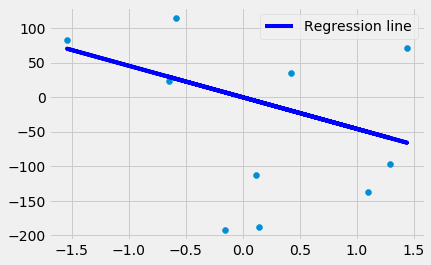

In [48]:
from sklearn.datasets.samples_generator import make_regression
x, y = make_regression(n_samples=10, n_features=1, noise=120)
plt.scatter(x,y)
plt.plot(x, 
         svd_reg(x,y) #Use function to create SVD REGRESSION LINE
         ,Color='b',LineWidth=4, label='Regression line')
plt.legend();

# Appendix

## A.1

Python:
- Vectors with 2nd row as 1

Norm:
Matlab:
- Norm is the 2-norm
Python:
- Frobenius norm

In [40]:
import numpy as np
np.shape(np.array([1,2,3]))

(3,)

In [41]:
np.shape(np.array([1,2,3]).T)

(3,)

In [42]:
np.shape(np.array([1,2,3]).reshape(-1,1))

(3, 1)

## A.2 Matrix inversion
- Using solve is faster and more stable numerically than using matrix inversion¶

In [43]:
A1 = np.random.random((1000,1000))
b1 = np.random.random(1000)

In [44]:
%timeit np.linalg.solve(A1, b1)

52.1 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
%timeit np.linalg.inv(A1) @b1

65.9 ms ± 6.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
